In [1]:
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
import pandas as pd

In [2]:
dataset_original = pd.read_csv('breast_ori.csv', header = None)

label_dataset = dataset_original.iloc[-1]

# We start by second column and remove last row
dataset_original = dataset_original.iloc[:-1, 1:]

for i in xrange(dataset_original.shape[1]):
    
    # Change to number first
    dataset_original.iloc[:, i] = pd.to_numeric(dataset_original.iloc[:, i], errors='coerce')
    # Find the lowest value without NaN
    low = np.nanmin(dataset_original.iloc[:, i].values)
    # Find the highest value without NaN
    high = np.nanmax(dataset_original.iloc[:, i].values)
    # Replace Na without (low + high) / 2.0
    dataset_original.iloc[:, i] = dataset_original.iloc[:, i].fillna((low + high) / 2.0)

In [3]:
dataset_clone = pd.read_csv('training_data.csv', header = None)

# We start by second column
dataset_clone = dataset_clone.iloc[:, 1:]

for i in xrange(dataset_clone.shape[1]):
    
    # Change to number first
    dataset_clone.iloc[:, i] = pd.to_numeric(dataset_clone.iloc[:, i], errors='coerce')
    # Find the lowest value without NaN
    low = np.nanmin(dataset_clone.iloc[:, i].values)
    # Find the highest value without NaN
    high = np.nanmax(dataset_clone.iloc[:, i].values)
    # Replace Na without (low + high) / 2.0
    dataset_clone.iloc[:, i] = dataset_clone.iloc[:, i].fillna((low + high) / 2.0)

In [4]:
from sklearn.preprocessing import LabelEncoder

label_dataset = label_dataset.iloc[1:].values

print "got : " + str(label_dataset.shape[0]) + " data"

label = np.unique(label_dataset)

label_dataset = LabelEncoder().fit_transform(label_dataset)

got : 97 data


In [5]:
dataset_original = dataset_original.iloc[:, :].values.T
dataset_clone = dataset_clone.iloc[:, :].values.T

dataset_clone_prime = pd.read_csv('test_data.csv')

# We start by second column
dataset_clone_prime = dataset_clone_prime.iloc[:, 1:].values.T

dataset_clone = np.concatenate((dataset_clone, dataset_clone_prime), axis = 0)

In [6]:
X_original = StandardScaler().fit_transform(dataset_original)
X_original = Normalizer().fit_transform(X_original)

X_original = PCA(n_components = 2).fit_transform(X_original)
X_clone = PCA(n_components = 2).fit_transform(dataset_clone)

datasets = [X_original, X_clone]

step = 0.2

titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

regularization = 1.0

models = [svm.SVC(kernel = 'linear', C = regularization), svm.LinearSVC(C = regularization),
          svm.SVC(kernel = 'rbf', gamma = 0.7, C = regularization),
          svm.SVC(kernel = 'poly', degree = 2, C = regularization)]

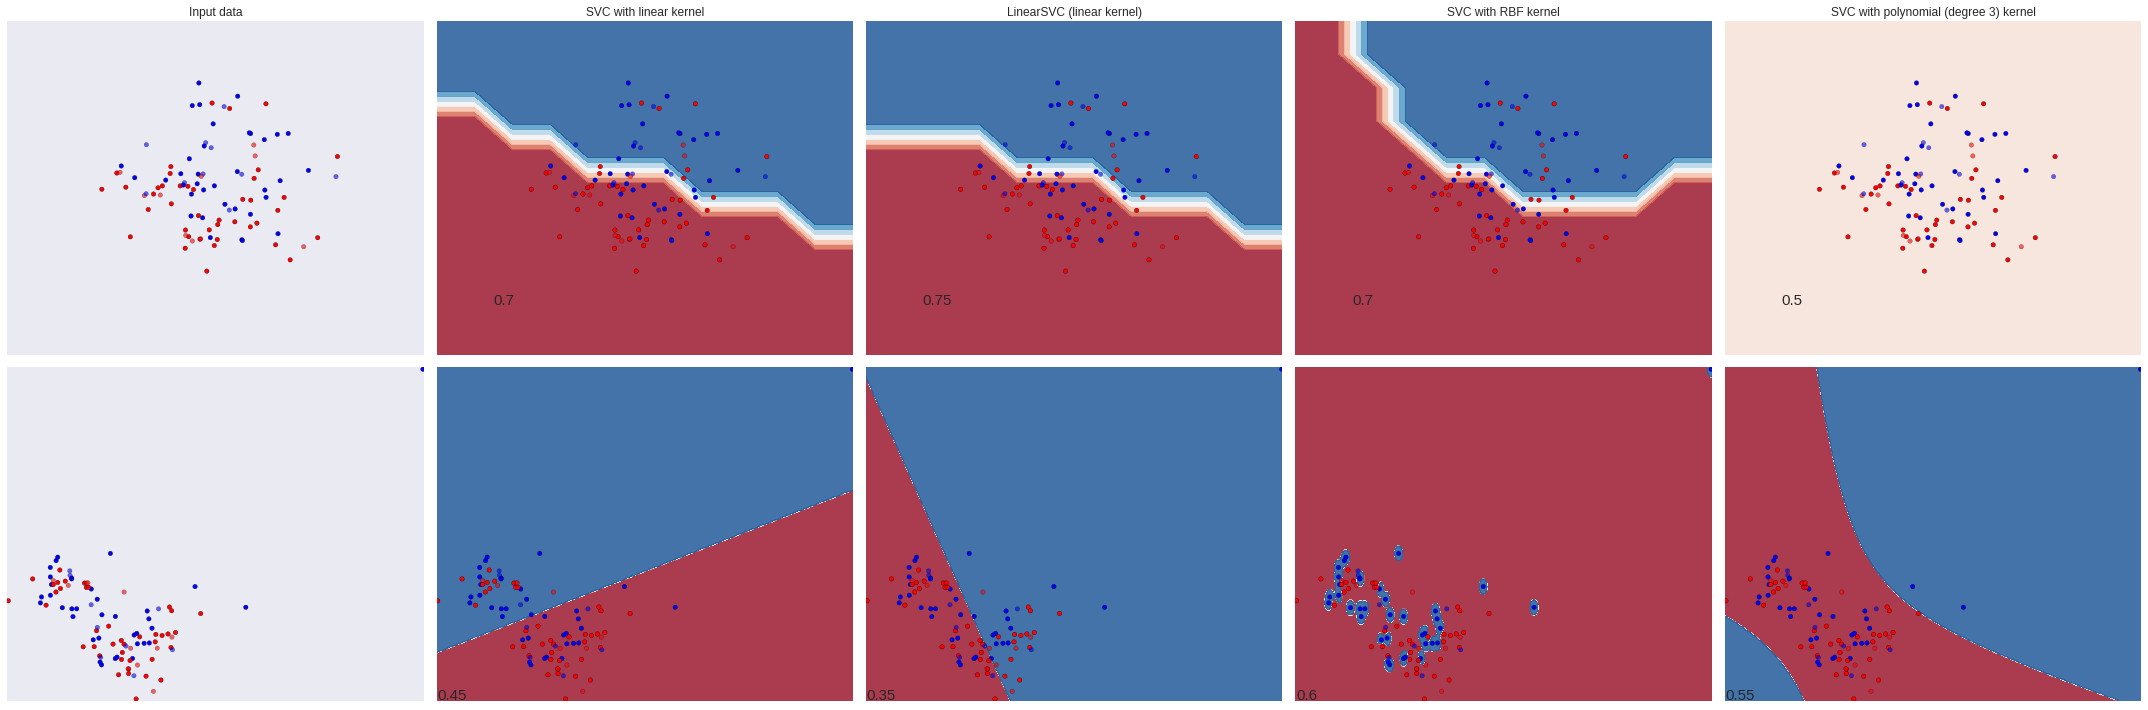

In [12]:
figure = plt.figure(figsize = (30, 10))
i = 1

for no, sample in enumerate(datasets):
    
    X_train, X_test, Y_train, Y_test = train_test_split(sample, label_dataset, test_size = 0.2)
    x_min, x_max = sample[:, 0].min() - 0.5, sample[:, 0].max() + 0.5
    y_min, y_max = sample[:, 1].min() - 0.5, sample[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(models) + 1, i)
    
    if no == 0:
        ax.set_title('Input data')
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, cmap = cm_bright)
    ax.scatter(X_test[:, 0], X_test[:, 1], c = Y_test, cmap = cm_bright, alpha = 0.6)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    for name, clf in zip(titles, models):
        ax = plt.subplot(len(datasets), len(models) + 1, i)
        clf.fit(X_train, Y_train)
        score = clf.score(X_test, Y_test)
        
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap = cm, alpha = 0.8)
        
        ax.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, cmap = cm_bright)
        ax.scatter(X_test[:, 0], X_test[:, 1], c = Y_test, cmap = cm_bright, alpha = 0.6)
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        if no == 0:
            ax.set_title(name)
            
        ax.text(xx.min() + 0.3, yy.min() + 0.3, str(score), size = 15)
        
        i += 1
            
plt.tight_layout()
plt.savefig('classifier_comparison.pdf')
plt.savefig('classifier_comparison.png')
plt.show()